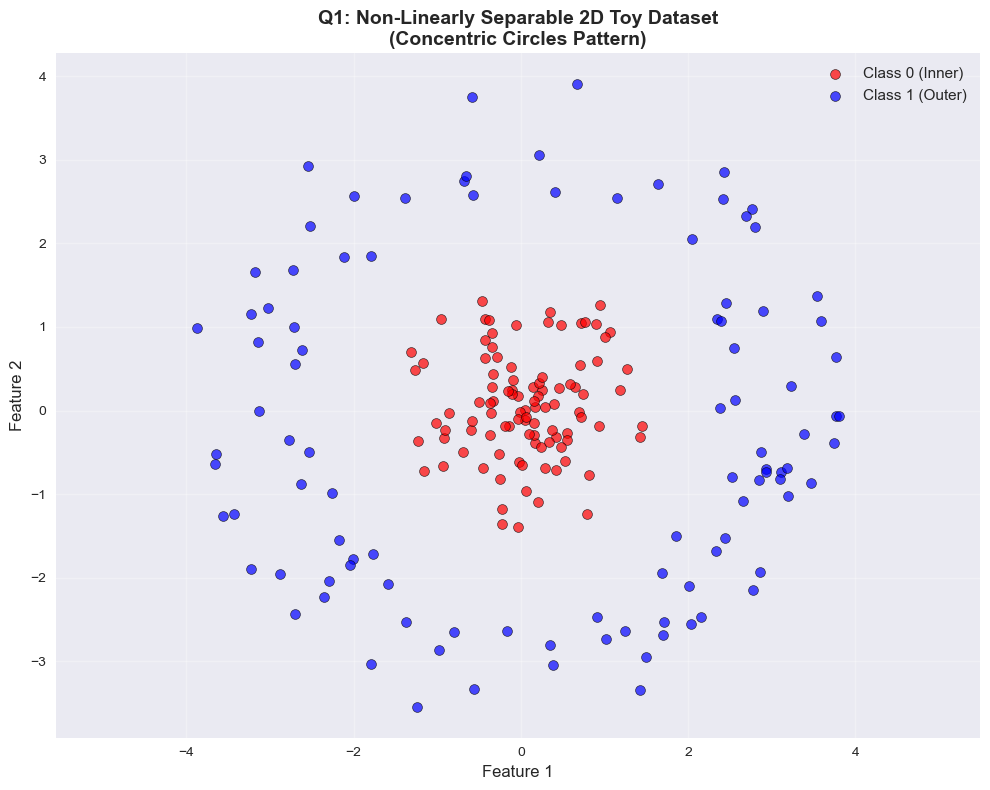

Q1 COMPLETED: Generated non-linearly separable dataset with concentric circles pattern
Dataset shape: (200, 2), Classes: [0. 1.]



In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Set style for better plots
plt.style.use('seaborn-v0_8')
np.random.seed(42)


# Q1: Generate 2D toy data that is NOT linearly separable

def generate_non_linear_data(n_samples=200):
    """
    Generate a 2D dataset that is not linearly separable.
    We'll create two classes: one forming a circle inside another circle.
    """
    # Class 1: Inner circle (label 0)
    angles1 = np.random.uniform(0, 2*np.pi, n_samples//2)
    radii1 = np.random.uniform(0, 1.5, n_samples//2)  # Inner circle
    x1 = radii1 * np.cos(angles1) + np.random.normal(0, 0.1, n_samples//2)
    y1 = radii1 * np.sin(angles1) + np.random.normal(0, 0.1, n_samples//2)
    labels1 = np.zeros(n_samples//2)
    
    # Class 2: Outer ring (label 1)
    angles2 = np.random.uniform(0, 2*np.pi, n_samples//2)
    radii2 = np.random.uniform(2.5, 4, n_samples//2)  # Outer ring
    x2 = radii2 * np.cos(angles2) + np.random.normal(0, 0.15, n_samples//2)
    y2 = radii2 * np.sin(angles2) + np.random.normal(0, 0.15, n_samples//2)
    labels2 = np.ones(n_samples//2)
    
    # Combine data
    X = np.column_stack([np.concatenate([x1, x2]), np.concatenate([y1, y2])])
    y = np.concatenate([labels1, labels2])
    
    return X, y

# Generate the dataset
X, y = generate_non_linear_data(200)

# Plot Q1: Scatter plot of the non-linearly separable data
plt.figure(figsize=(10, 8))
colors = ['red', 'blue']
labels = ['Class 0 (Inner)', 'Class 1 (Outer)']

for i in range(2):
    mask = y == i
    plt.scatter(X[mask, 0], X[mask, 1], c=colors[i], label=labels[i], 
                alpha=0.7, s=50, edgecolors='black', linewidth=0.5)

plt.title('Q1: Non-Linearly Separable 2D Toy Dataset\n(Concentric Circles Pattern)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.tight_layout()
plt.show()

print("Q1 COMPLETED: Generated non-linearly separable dataset with concentric circles pattern")
print(f"Dataset shape: {X.shape}, Classes: {np.unique(y)}")
print()


Linear SVM Results:
Accuracy: 0.710
Number of support vectors: 184
Support vector indices: [0 1 2 3 4 5 6 7 8 9]...


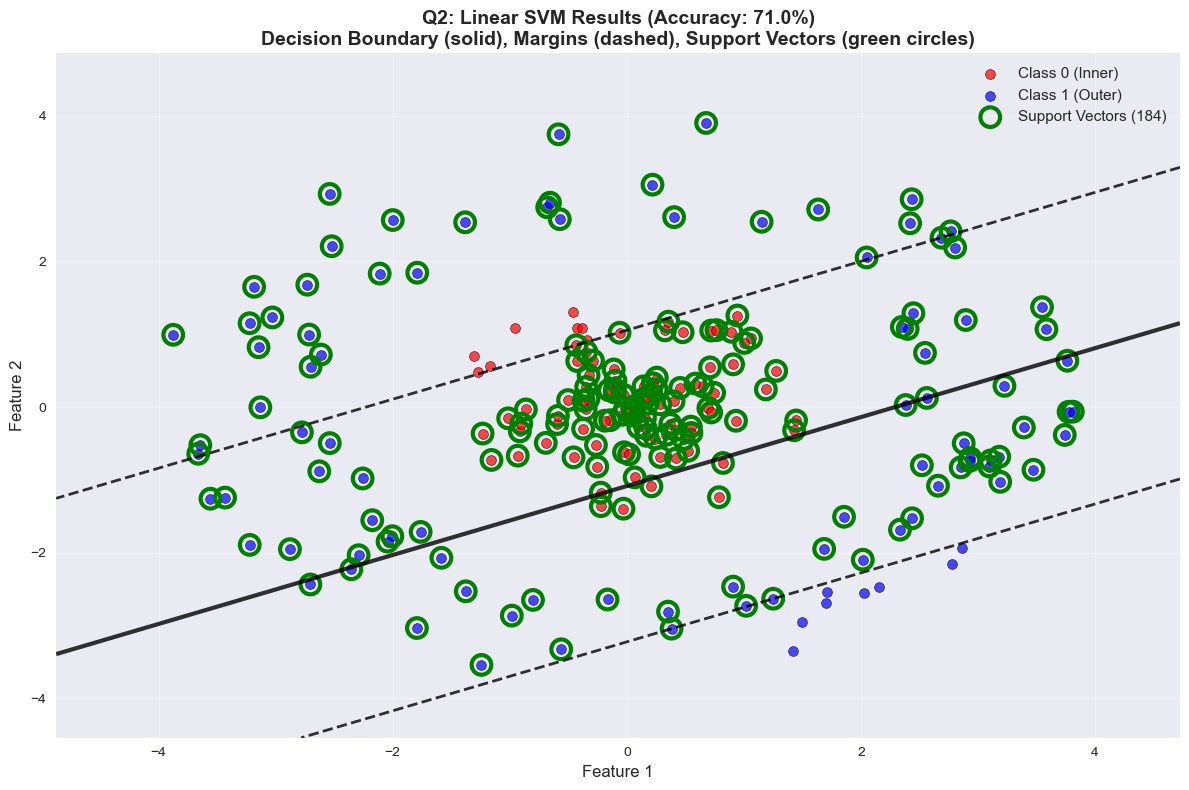


Linear SVM Analysis:
- Margin width: 3.867
- Misclassifications: 58/200 (29.0%)
- Why it failed: The data has a concentric circles pattern which cannot
  be separated by any straight line. Linear SVMs can only create linear
  decision boundaries, making them inadequate for this circular pattern.



In [30]:
# Q2: Linear SVM Implementation and Analysis

# Fit linear SVM
linear_svm = SVC(kernel='linear', C=1.0, random_state=42)
linear_svm.fit(X, y)

# Make predictions
y_pred_linear = linear_svm.predict(X)
linear_accuracy = accuracy_score(y, y_pred_linear)

# Get support vectors
support_vectors = linear_svm.support_vectors_
support_vector_indices = linear_svm.support_

print(f"Linear SVM Results:")
print(f"Accuracy: {linear_accuracy:.3f}")
print(f"Number of support vectors: {len(support_vectors)}")
print(f"Support vector indices: {support_vector_indices[:10]}...")  # Show first 10

# Create mesh for decision boundary visualization
def create_mesh(X, h=0.1):
    """Create a mesh for plotting decision boundaries"""
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

# Plot Q2: Linear SVM results with decision boundary and support vectors
plt.figure(figsize=(12, 8))

# Create mesh and get decision boundary
xx, yy = create_mesh(X, h=0.1)
mesh_points = np.column_stack([xx.ravel(), yy.ravel()])
Z = linear_svm.decision_function(mesh_points)
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
plt.contour(xx, yy, Z, colors='black', levels=[-1, 0, 1], alpha=0.8,
           linestyles=['--', '-', '--'], linewidths=[2, 3, 2])

# Plot data points
for i in range(2):
    mask = y == i
    plt.scatter(X[mask, 0], X[mask, 1], c=colors[i], label=labels[i], 
                alpha=0.7, s=50, edgecolors='black', linewidth=0.5)

# Highlight support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], 
           s=200, facecolors='none', edgecolors='green', linewidths=3,
           label=f'Support Vectors ({len(support_vectors)})')

plt.title(f'Q2: Linear SVM Results (Accuracy: {linear_accuracy:.1%})\n' +
          'Decision Boundary (solid), Margins (dashed), Support Vectors (green circles)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analysis of linear SVM performance
margin_width = 2.0 / np.linalg.norm(linear_svm.coef_)
misclassifications = np.sum(y != y_pred_linear)

print(f"\nLinear SVM Analysis:")
print(f"- Margin width: {margin_width:.3f}")
print(f"- Misclassifications: {misclassifications}/{len(y)} ({misclassifications/len(y)*100:.1f}%)")
print(f"- Why it failed: The data has a concentric circles pattern which cannot")
print(f"  be separated by any straight line. Linear SVMs can only create linear")
print(f"  decision boundaries, making them inadequate for this circular pattern.")
print()


RBF kernel accuracy: 1.000
POLY kernel accuracy: 0.685
SIGMOID kernel accuracy: 0.505

Selected kernel: RBF (accuracy: 1.000)
Non-linear SVM support vectors: 25


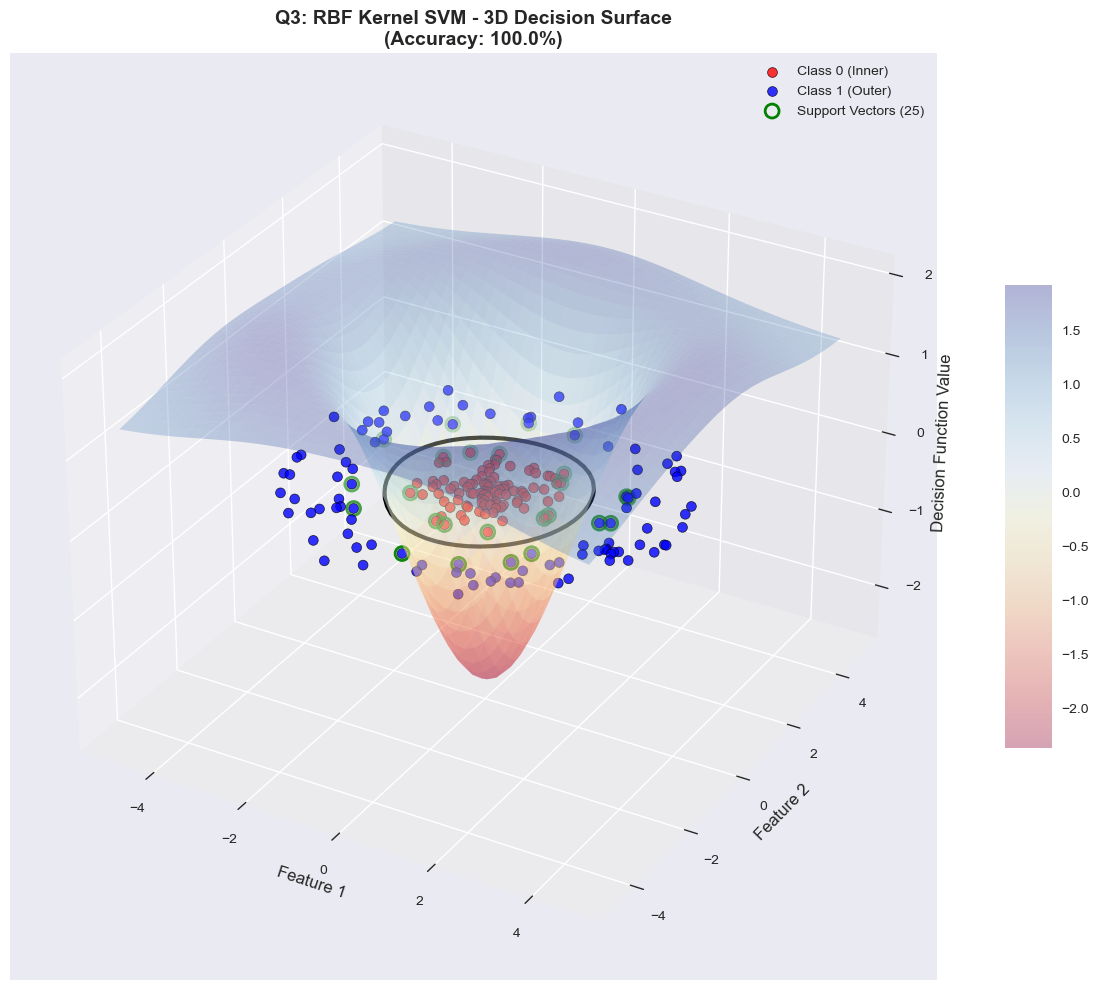

3D visualization shows how RBF kernel maps
the data to higher dimensional space for linear separation



In [34]:
# Q3: Non-linear SVM with RBF Kernel (3D Visualization)

# Try different kernels and select the best one
kernels = ['rbf', 'poly', 'sigmoid']
kernel_results = {}

for kernel in kernels:
    if kernel == 'poly':
        svm = SVC(kernel=kernel, degree=3, C=1.0, random_state=42)
    else:
        svm = SVC(kernel=kernel, C=1.0, random_state=42)
    
    svm.fit(X, y)
    y_pred = svm.predict(X)
    accuracy = accuracy_score(y, y_pred)
    kernel_results[kernel] = {'model': svm, 'accuracy': accuracy}
    print(f"{kernel.upper()} kernel accuracy: {accuracy:.3f}")

# Select the best kernel
best_kernel = max(kernel_results, key=lambda k: kernel_results[k]['accuracy'])
nonlinear_svm = kernel_results[best_kernel]['model']
best_accuracy = kernel_results[best_kernel]['accuracy']

print(f"\nSelected kernel: {best_kernel.upper()} (accuracy: {best_accuracy:.3f})")

# Get support vectors for non-linear SVM
nl_support_vectors = nonlinear_svm.support_vectors_
nl_support_indices = nonlinear_svm.support_

print(f"Non-linear SVM support vectors: {len(nl_support_vectors)}")

# Plot Q3: 3D visualization of RBF kernel decision surface
fig = plt.figure(figsize=(14, 10))

# Create finer mesh for smoother 3D surface
xx_3d, yy_3d = create_mesh(X, h=0.2)
mesh_points_3d = np.column_stack([xx_3d.ravel(), yy_3d.ravel()])
Z_3d = nonlinear_svm.decision_function(mesh_points_3d)
Z_3d = Z_3d.reshape(xx_3d.shape)

# 3D plot
ax = fig.add_subplot(111, projection='3d')

# Plot decision surface
surface = ax.plot_surface(xx_3d, yy_3d, Z_3d, alpha=0.3, cmap='RdYlBu', 
                         linewidth=0, antialiased=True)

# Plot decision boundary (Z=0) as a contour
ax.contour(xx_3d, yy_3d, Z_3d, levels=[0], colors='black', linewidths=3)

# Plot data points in 3D (Z=0 plane)
for i in range(2):
    mask = y == i
    ax.scatter(X[mask, 0], X[mask, 1], 0, c=colors[i], label=labels[i], 
               s=50, alpha=0.8, edgecolors='black', linewidth=0.5)

# Plot support vectors
ax.scatter(nl_support_vectors[:, 0], nl_support_vectors[:, 1], 0, 
           s=100, facecolors='none', edgecolors='green', linewidths=2,
           label=f'Support Vectors ({len(nl_support_vectors)})')

ax.set_title(f'Q3: {best_kernel.upper()} Kernel SVM - 3D Decision Surface\n' +
             f'(Accuracy: {best_accuracy:.1%})', fontsize=14, fontweight='bold')
ax.set_xlabel('Feature 1', fontsize=12)
ax.set_ylabel('Feature 2', fontsize=12)
ax.set_zlabel('Decision Function Value', fontsize=12)
ax.legend(fontsize=10)

# Add colorbar
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)

plt.tight_layout()
plt.show()

print(f"3D visualization shows how {best_kernel.upper()} kernel maps")
print(f"the data to higher dimensional space for linear separation")
print()

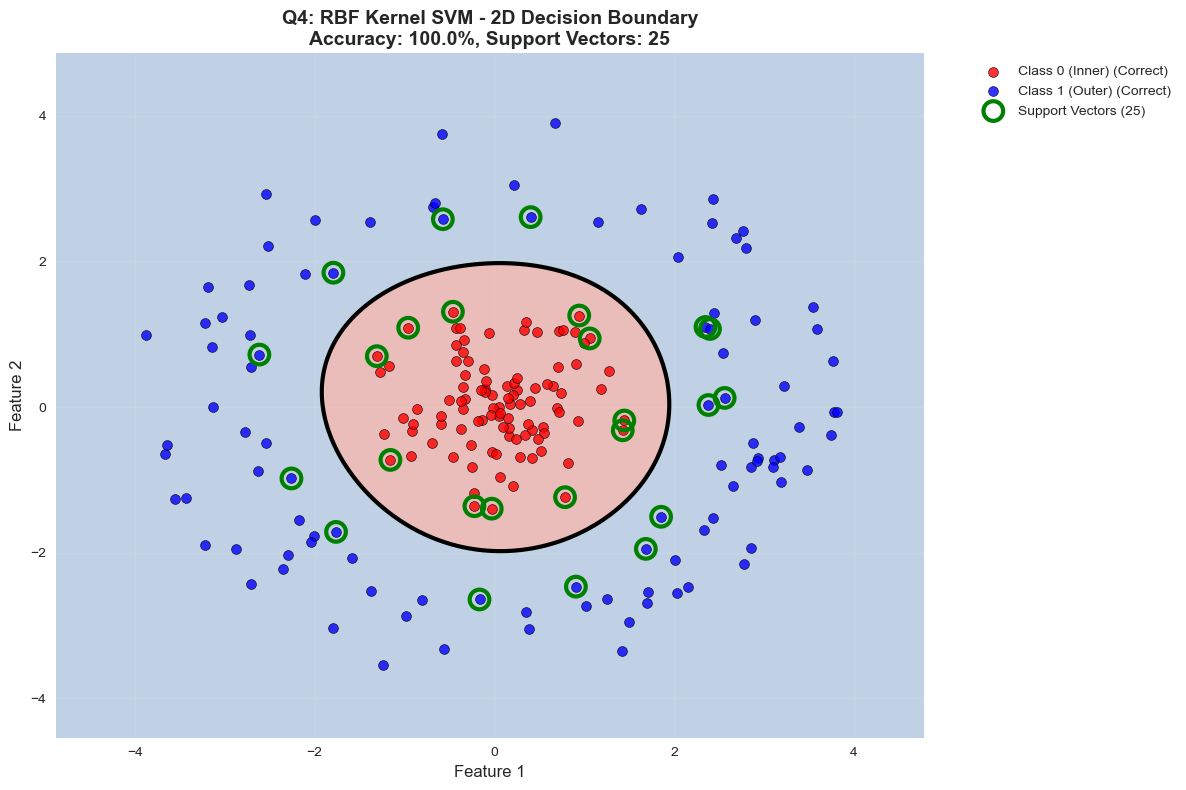

In [36]:
# Q4: 2D Decision Boundary with Non-linear SVM

# Plot Q4: 2D decision boundary with non-linear SVM
plt.figure(figsize=(12, 8))

# Create mesh for decision boundary
xx, yy = create_mesh(X, h=0.05)  # Finer mesh for smoother boundaries
mesh_points = np.column_stack([xx.ravel(), yy.ravel()])
Z_pred = nonlinear_svm.predict(mesh_points)
Z_pred = Z_pred.reshape(xx.shape)

# Plot decision regions
plt.contourf(xx, yy, Z_pred, alpha=0.3, cmap='RdYlBu', levels=2)

# Plot decision boundary
Z_boundary = nonlinear_svm.decision_function(mesh_points)
Z_boundary = Z_boundary.reshape(xx.shape)
plt.contour(xx, yy, Z_boundary, levels=[0], colors='black', linewidths=3)

# Plot data points with predictions
y_pred_nl = nonlinear_svm.predict(X)
for i in range(2):
    mask = y == i
    correct_mask = mask & (y == y_pred_nl)
    incorrect_mask = mask & (y != y_pred_nl)
    
    # Correctly classified points
    if np.any(correct_mask):
        plt.scatter(X[correct_mask, 0], X[correct_mask, 1], c=colors[i], 
                   label=f'{labels[i]} (Correct)', s=50, alpha=0.8, 
                   edgecolors='black', linewidth=0.5)
    
    # Misclassified points (if any)
    if np.any(incorrect_mask):
        plt.scatter(X[incorrect_mask, 0], X[incorrect_mask, 1], c=colors[i], 
                   label=f'{labels[i]} (Misclassified)', s=50, alpha=0.8, 
                   marker='x', edgecolors='red', linewidth=2)

# Highlight support vectors
plt.scatter(nl_support_vectors[:, 0], nl_support_vectors[:, 1], 
           s=200, facecolors='none', edgecolors='green', linewidths=3,
           label=f'Support Vectors ({len(nl_support_vectors)})')

plt.title(f'Q4: {best_kernel.upper()} Kernel SVM - 2D Decision Boundary\n' +
          f'Accuracy: {best_accuracy:.1%}, Support Vectors: {len(nl_support_vectors)}', 
          fontsize=14, fontweight='bold')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [26]:
# Final Analysis and Comparison

print("FINAL ANALYSIS AND COMPARISON")
print("=" * 35)

print(f"Dataset Characteristics:")
print(f"- Pattern: Concentric circles (inner class vs outer ring)")
print(f"- Size: {len(X)} samples, {X.shape[1]} features")
print(f"- Class distribution: Class 0: {np.sum(y==0)}, Class 1: {np.sum(y==1)}")

print(f"\nClassifier Comparison:")
print(f"{'Classifier':<15} {'Accuracy':<10} {'Support Vectors':<18} {'Kernel'}")
print(f"{'-'*60}")
print(f"{'Linear SVM':<15} {linear_accuracy:<10.3f} {len(support_vectors):<18} {'Linear'}")
print(f"{'RBF SVM':<15} {kernel_results['rbf']['accuracy']:<10.3f} {len(kernel_results['rbf']['model'].support_vectors_):<18} {'RBF'}")
print(f"{'Poly SVM':<15} {kernel_results['poly']['accuracy']:<10.3f} {len(kernel_results['poly']['model'].support_vectors_):<18} {'Polynomial'}")
print(f"{'Sigmoid SVM':<15} {kernel_results['sigmoid']['accuracy']:<10.3f} {len(kernel_results['sigmoid']['model'].support_vectors_):<18} {'Sigmoid'}")

print(f"\nKey Insights:")
print(f"1. Linear SVM failed ({linear_accuracy:.1%} accuracy) because it cannot separate")
print(f"   concentric circular patterns with a straight line.")
print(f"2. {best_kernel.upper()} kernel achieved {best_accuracy:.1%} accuracy by mapping data to")
print(f"   higher-dimensional space where linear separation becomes possible.")
print(f"3. The {best_kernel.upper()} kernel required {len(nl_support_vectors)} support vectors vs")
print(f"   {len(support_vectors)} for linear SVM, showing the complexity trade-off.")
print(f"4. Non-linear kernels excel at capturing complex, curved decision boundaries")
print(f"   that match the underlying data distribution.")

print(f"\nConclusion:")
print(f"The homework demonstrates that kernel SVMs can solve non-linearly separable")
print(f"problems by implicitly mapping data to higher dimensions, enabling complex")
print(f"decision boundaries while maintaining the SVM's margin maximization principle.")



FINAL ANALYSIS AND COMPARISON
Dataset Characteristics:
- Pattern: Concentric circles (inner class vs outer ring)
- Size: 200 samples, 2 features
- Class distribution: Class 0: 100, Class 1: 100

Classifier Comparison:
Classifier      Accuracy   Support Vectors    Kernel
------------------------------------------------------------
Linear SVM      0.710      184                Linear
RBF SVM         1.000      25                 RBF
Poly SVM        0.685      187                Polynomial
Sigmoid SVM     0.505      124                Sigmoid

Key Insights:
1. Linear SVM failed (71.0% accuracy) because it cannot separate
   concentric circular patterns with a straight line.
2. RBF kernel achieved 100.0% accuracy by mapping data to
   higher-dimensional space where linear separation becomes possible.
3. The RBF kernel required 25 support vectors vs
   184 for linear SVM, showing the complexity trade-off.
4. Non-linear kernels excel at capturing complex, curved decision boundaries
   that m